In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#Step 3: Extracting Input cols(Features) and Output(Target)
data['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [8]:
X=data.iloc[:,0:1].values

In [10]:
y=data.iloc[:,1].values

In [45]:
#Step 4:Cross validation/Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape

(24, 1)

In [47]:
X_test.shape

(6, 1)

In [48]:
y_train.shape

(24,)

In [49]:
y_test.shape

(6,)

In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [51]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
X_test

array([[1.3],
       [3.7],
       [1.1],
       [2.9],
       [3.9],
       [5.9]])

In [53]:
y_test

array([46205., 57189., 39343., 56642., 63218., 81363.])

In [54]:
regressor.predict(X_test[1].reshape(1,1))

array([59614.85213469])

In [55]:
regressor.predict(np.array(100).reshape(1,1))

array([999141.35302854])

In [56]:
def salary_predictor(experience):
    print(regressor.predict(np.array(experience).reshape(1,1))[0])

In [57]:
salary_predictor(500)

4901639.799108901


In [58]:
exp=data['YearsExperience'].values

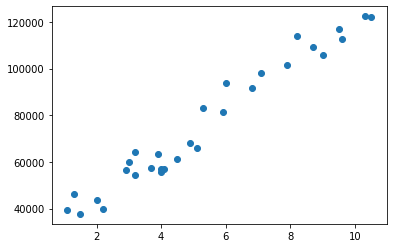

In [59]:
plt.scatter(exp,y)


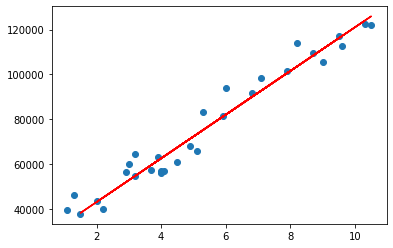

In [60]:
plt.scatter(exp,y)
plt.plot(X_train, regressor.predict(X_train),color='red')

In [61]:
m=regressor.coef_[0]
m

9756.246115200907

In [62]:
c=regressor.intercept_
c

23516.741508448016

In [63]:
m*500+c

4901639.799108901

In [64]:
from sklearn.metrics import r2_score

In [65]:
y_pred=regressor.predict(X_test)
y_pred

array([36199.86145821, 59614.85213469, 34248.61223517, 51809.85524253,
       61566.10135773, 81078.59358813])

In [66]:
y_test

array([46205., 57189., 39343., 56642., 63218., 81363.])

In [67]:
r2_score(y_test,y_pred)

0.8508556868321372

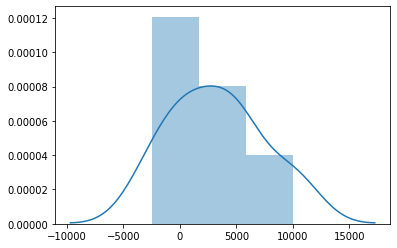

In [68]:
sns.distplot(y_test-y_pred)